Q1 ) Graphically analyze the data and comment on how the age of the clock and the numberof bidders are affecting the auctioned selling price.

In [64]:
library(scatterplot3d)

In [65]:
d = read.table("clock_prices.data",header = T)

In [66]:
summary(d)
head(d)

      Age           Bidders           Price     
 Min.   :108.0   Min.   : 5.000   Min.   : 729  
 1st Qu.:117.0   1st Qu.: 7.000   1st Qu.:1053  
 Median :140.0   Median : 9.000   Median :1258  
 Mean   :144.9   Mean   : 9.531   Mean   :1327  
 3rd Qu.:168.5   3rd Qu.:11.250   3rd Qu.:1561  
 Max.   :194.0   Max.   :15.000   Max.   :2131  

Age,Bidders,Price
<int>,<int>,<int>
127,13,1235
115,12,1080
127,7,845
150,9,1522
156,6,1047
182,11,1979


In [67]:
age = d$Age
nbids = d$Bidders
price = d$Price

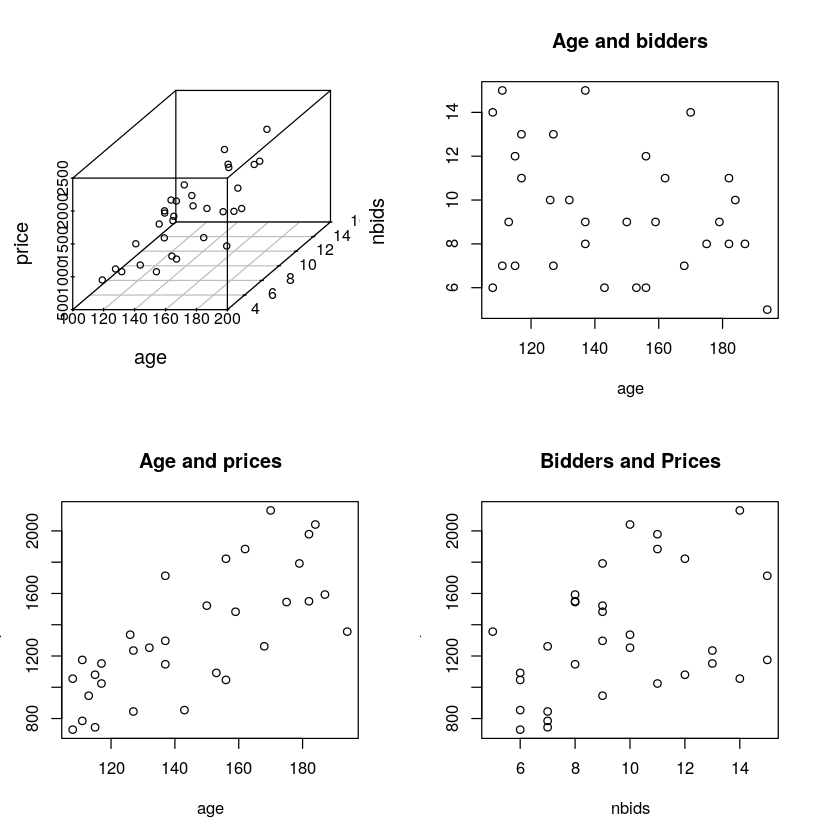

In [68]:
par(mfrow=c(2,2))
scatterplot3d(age,nbids,price)
plot(age,nbids,main = 'Age and bidders',ylab='nbids')
plot(age,price,main = 'Age and prices',ylab='price')
plot(nbids,price,main = 'Bidders and Prices', ylab='price')


Ans 1) From the plots it is seen that 
i) As the age of the clocks increase there is increase in price (A positive linear association is seen from plot3)
ii) As the number of bidders increase the prices increase.

# First order multiple Linear regression Model


Q2.Fit a first order multiple regression model to the data and answer the following basedon this model:

a.Is the model useful?

In [69]:
model = lm(price~age+nbids)

In [70]:
summary(model)


Call:
lm(formula = price ~ age + nbids)

Residuals:
   Min     1Q Median     3Q    Max 
-207.2 -117.8   16.5  102.7  213.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1336.7221   173.3561  -7.711 1.67e-08 ***
age            12.7362     0.9024  14.114 1.60e-14 ***
nbids          85.8151     8.7058   9.857 9.14e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 133.1 on 29 degrees of freedom
Multiple R-squared:  0.8927,	Adjusted R-squared:  0.8853 
F-statistic: 120.7 on 2 and 29 DF,  p-value: 8.769e-15


In [71]:
vcov(model)

,(Intercept),age,nbids
(Intercept),30052.3464,-137.0211043,-1011.297955
age,-137.0211,0.8142905,1.993429
nbids,-1011.2980,1.9934289,75.790202


Ans 2a) Yes, The Model is useful as the proportion of variability explained by the model is significant as p-value is very low

Q2b).Given the age of a clock, by what amount can one expect the selling price to go upfor one more person participating in the auction?


Ans) For a given age of a clock, addition of one more person participating in the auction will result in £85.8151 increase in price of the clock

Q2 c).An auction house has acquired several grandfather clocks each 100 years old paying an average price of £500 per clock. From the past experience it has found that suchauctions (for antique grandfather clocks) typically attract about 10-12 bidders.What can be said about its expected profit per clock with 95% confidence?

In [72]:
=df = data.frame(age = c(100,100,100),nbids = c(10,11,12))

In [73]:
x = predict.lm(model, newdata=df,se.fit=T,level = 0.95,interval = "confidence")

In [74]:
x$fit - 500 #Profits (substracting cost of the clocks )

fit,lwr,upr
295.0492,200.6368,389.4615
380.8643,287.1706,474.5580
466.6794,370.3602,562.9986


Ans) The predicted profits with clocks of age 100 having bidders 10 or 11 or 12 respectively are given above with confidence interval of 95%

Q2 d)You walk into an auction selling an antique 150 year old grandfather clock and findthat there are 15 bidders (including yourself) participating in the auction.  Youare extremely keen in acquiring the clock.  At least what amount should you bid for the clock, so that, you are 99% certain that nobody else can out-bid you?

In [75]:
df = data.frame(age = c(150),nbids = c(15))

In [76]:
predict.lm(model, newdata=df,se.fit=T,level = 0.98,interval = "confidence")

fit,lwr,upr
1860.935,1727.171,1994.698


Ans 2d) I will have to bid for atleast £1721.171 (lower bound = estimated(nbids) - t0.99 * SE(nibds) ) so that in expectation I'am 99% certain that nobody else can out-bit me

# Partial Correlation Coefficients


Q2e) Find  the  partial  correlation  coefficients,  compare  them  with  the  corresponding marginal correlation coefficients, and comment on the nature of the relationships between the independent variables and the dependent variable.

In [77]:
31 *var(price) # SStotal (n-1)*Var

[1] 4791194

In [78]:
133.1^2*29  # SSE 

[1] 513752.7

In [79]:
4791194.21875 - 513752.69 #SSR

[1] 4277442

In [80]:
R2 = 4277441.52875 / 4791194.21875 # R^2 of the model (ie) Proportion of variability explained by joint linear effect of age and nbids
R2

[1] 0.8927715

In [81]:
anova(lm(price~age))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,2554859,2554859.01,34.27293,2.096498e-06
Residuals,30,2236335,74544.51,NA,NA


In [82]:
marr2a = 2554859/(2236335+2554859) # Marginal correlation coefficient of age
marr2a

[1] 0.5332406

In [83]:
1 - pf(marr2a/((1-marr2a)/29),1,29)

[1] 3.117755e-06

In [84]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,2554859.0,2554859.01,144.13606,8.957350e-13
nbids,1,1722300.7,1722300.69,97.16608,9.135309e-11
Residuals,29,514034.5,17725.33,NA,NA


In [85]:
anova(lm(price~nbids))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
nbids,1,746185.4,746185.4,5.53412,0.0254039
Residuals,30,4045008.8,134833.6,NA,NA


In [86]:
marr2b = 746185.4/(4045008.8+746185.4) # Marginal correlation coefficient of nbids
marr2b

[1] 0.155741

In [87]:
1 - pf(marr2b/((1-marr2b)/29),1,29)

[1] 0.02801946

In [88]:
anova(lm(price~nbids + age))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
nbids,1,746185.4,746185.43,42.09713,4.212285e-07
age,1,3530974.3,3530974.28,199.20502,1.597896e-14
Residuals,29,514034.5,17725.33,NA,NA


In [89]:
parr2ba = 1722300.7/2236335 #price,nbids|age Partial Correlation of nbids in the presence of age of the clock

In [90]:
parr2ba

[1] 0.7701443

In [91]:
sqrt(parr2ba/((1-parr2ba)/29)) # T value as seen in model

[1] 9.857288

In [92]:
1 - pf(parr2ba/((1-parr2ba)/29),1,29) # P value as seen in model

[1] 9.13527e-11

In [93]:
parr2ab = 3530974.3/4045008.8 #price,age/nbids Partial Correlation of age in the presence of nbids

In [94]:
parr2ab

[1] 0.8729213

In [95]:
sqrt(parr2ab/((1-parr2ab)/29)) # T value as seen in the model

[1] 14.114

In [96]:
1 - pf(parr2ab/((1-parr2ab)/29),1,29) # P value as seen in model

[1] 1.598721e-14

Ans Q2e)
Marginal correlation price,age = 0.533240565921564 <br>
Marginal correlation price,nbids = 0.155741005029602<br>
Partial correlation price,nbids|age = 0.770144320953703<br>
Partial correlation price,age|nbids = 0.872921290059987<br>
<br>
As such proportion of variation in price explained by the linear effect of nbins is only 15.5% with p-value =0.028019 <br>
The proportion of variation in price explained by the linear effect of age alone is 53.3% with pvalue = 3.11775533823333e-06 <br>
<br>
The proportion of variation in price explained by the nbids in the presence of age is 77% with p-value = 9.13527031798367e-11<br>
The proportion of variation in price explained by the age in the presence of nbids is 87.3% with p-value = 1.59872115546023e-14<br>
<br>
The proportion of variability in price explained by the joint linear effect of age and nbids is 89.3% with p-value =8.769e-15<br>

2Q f).In presence of the other, which of the two factors, age of the clock or the number of bidders, is more important in determining the selling price of a clock?

Ans Q2f)<br>
The partial  effects  of  both  the  explanatory  variables  are  statistically significant, as is their joint effect. However age is a more important determinant of price compared to nbids because, first, marginally age explains  53.3% of  the  variability  in price compared  to nbid's 15.5%.
<br><br>
Second,  after  accounting  for  the  linear  effect  of age(on price),  the  linear  effect  of nbids additionally  accounts  for  77%  of  the  remaining variability  in price;  compared  to  after  accounting  for  the  linear  effect  of nbids(on price),  the  linear  effect  of age additionally  accounts  for  87.3%  of  the  remaining variability  in price

# Residual Analysis

Q3)Is  the  first  order  model  acceptable?   Fit  as  appropriate  a  model  as  possible  for  the auctioned selling price of grandfather clocks, based on the information on the age of the clock and the number of bidders, and then based on this model answer the same questions as in 2. b,c, and d above.

In [97]:
res = residuals(model)/(133.1*sqrt(1-influence(model)$hat))

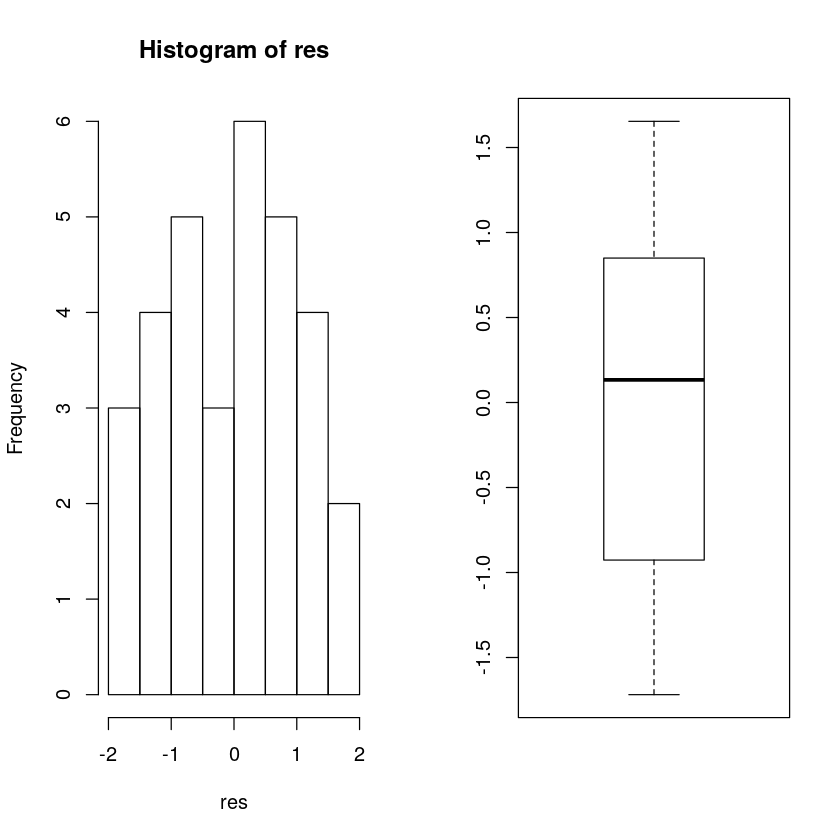

In [98]:
par(mfrow=c(1,2))
hist(res)
boxplot(res)

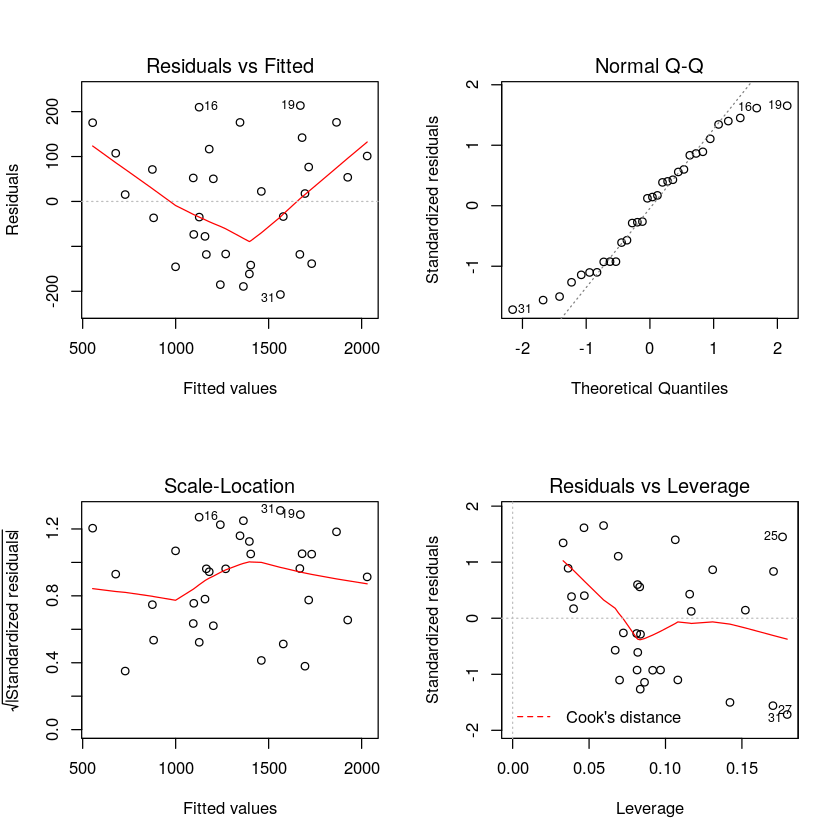

In [99]:
par(mfrow = c(2,2))
plot(model)

In [100]:
source('normality.r')
normtest(res)

Method,P.value
<fct>,<dbl>
Shapiro-Wilk normality test,0.1522839
Anderson-Darling normality test,0.2488978
Cramer-von Mises normality test,0.2872351
Lilliefors (Kolmogorov-Smirnov) normality test,0.2001644
Shapiro-Francia normality test,0.3231334


In [101]:
library(lmtest)
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 0.43689, df = 2, p-value = 0.8038


Ans 3) Although the residuals are normal and homoskedastic. The residual plot is not completely white noise which gives room for a better model.

In [102]:
price1 = (price - mean(price))/sd(price)
age1 = (age - mean(age))/sd(age)
nbids1 = (nbids - mean(nbids))/sd(nbids)
#model1 = lm(price~+nbids+I(nbids*age))
model1 = lm(price1~age1 + nbids1 + I(nbids1*age1))

In [103]:
summary(model1)
anova(model1)


Call:
lm(formula = price1 ~ age1 + nbids1 + I(nbids1 * age1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37334 -0.18056  0.00536  0.12091  0.51371 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.06313    0.04104   1.538    0.135    
age1              0.92290    0.04213  21.905  < 2e-16 ***
nbids1            0.68405    0.04302  15.900 1.51e-15 ***
I(nbids1 * age1)  0.25683    0.04176   6.150 1.22e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2248 on 28 degrees of freedom
Multiple R-squared:  0.9544,	Adjusted R-squared:  0.9495 
F-statistic: 195.2 on 3 and 28 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age1,1,16.530457,16.53045686,327.17716,5.559894e-17
nbids1,1,11.143635,11.14363539,220.55912,8.371691e-15
I(nbids1 * age1),1,1.911222,1.91122221,37.82764,1.222134e-06
Residuals,28,1.414686,0.05052448,NA,NA


In [104]:
model2 = lm(price1~age1+nbids1)
summary(model2)
anova(model2)


Call:
lm(formula = price1 ~ age1 + nbids1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52699 -0.29976  0.04196  0.26121  0.54305 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.109e-18  5.987e-02   0.000        1    
age1         8.875e-01  6.288e-02  14.114 1.60e-14 ***
nbids1       6.198e-01  6.288e-02   9.857 9.14e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3387 on 29 degrees of freedom
Multiple R-squared:  0.8927,	Adjusted R-squared:  0.8853 
F-statistic: 120.7 on 2 and 29 DF,  p-value: 8.769e-15


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age1,1,16.530457,16.5304569,144.13606,8.957350e-13
nbids1,1,11.143635,11.1436354,97.16608,9.135309e-11
Residuals,29,3.325908,0.1146865,NA,NA


In [105]:
r2 = 1.911222/3.325908
r2

[1] 0.5746467

In [106]:
1- pf(r2/((1-r2)/28),1,28)

[1] 1.222139e-06

The proportion of variability explained by the interaction between age and nbids is significant

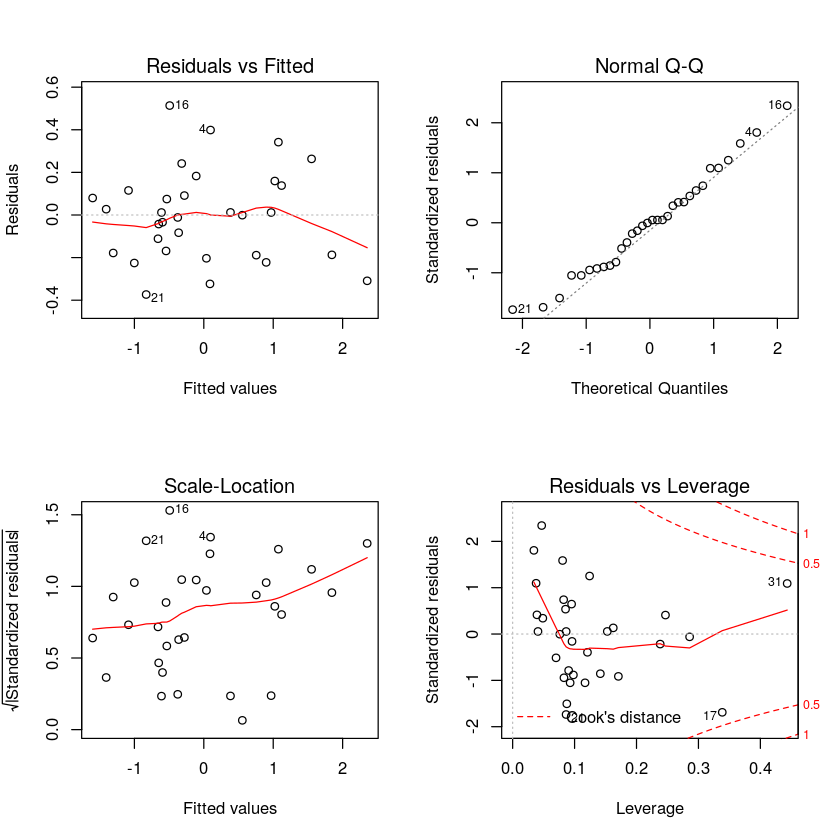

In [107]:
par(mfrow=c(2,2))
plot(model1)

In [108]:
normtest(residuals(model1))

Method,P.value
<fct>,<dbl>
Shapiro-Wilk normality test,0.7400928
Anderson-Darling normality test,0.7859060
Cramer-von Mises normality test,0.7846031
Lilliefors (Kolmogorov-Smirnov) normality test,0.6089159
Shapiro-Francia normality test,0.7332785


In [109]:
bptest(model1)


	studentized Breusch-Pagan test

data:  model1
BP = 1.5198, df = 3, p-value = 0.6777


Q3) 2b).Given the age of a clock, by what amount can one expect the selling price to go upfor one more person participating in the auction?

In [141]:

y= 0.6198*sd(nbids)+mean(nbids)
y

[1] 11.29125

Ans)For a given age of a clock, addition of one more person participating in the auction will result in £11.291 increase in price of the clock

Q3 2c) An auction house has acquired several grandfather clocks each 100 years old payingan average price of£500 per clock. From the past experience it has found that suchauctions (for antique grandfather clocks) typically attract about 10-12 bidders.What can be said about its expected profit per clock with 95% confidence?

In [128]:
df = data.frame(age = c(100,100,100),nbids = c(10,11,12))

In [130]:
df$age1 =(df$age - mean(age))/sd(age)
df$nbids1 =(df$nbids - mean(nbids))/sd(nbids)

In [131]:
x = predict.lm(model1, newdata=df,se.fit=T,level = 0.95,interval = "confidence")

In [135]:
((x$fit *sd(price) )+mean(price) )- 500

fit,lwr,upr
273.8822,210.7254,337.0390
310.2621,243.6869,376.8374
346.6420,271.1562,422.1278


Ans)The predicted profits with clocks of age 100 having bidders 10 or 11 or 12 respectively are given above with confidence interval of 95%

Q3 2d) You walk into an auction selling an antique 150 year old grandfather clock and findthat there are 15 bidders (including yourself) participating in the auction.  You are extremely keen in acquiring the clock.  At least what amount should you bidfor the clock, so that, you are 99% certain that nobody else can out-bid you?

In [136]:
df = data.frame(age = c(150),nbids = c(15))

In [137]:
df$age1 =(df$age - mean(age))/sd(age)
df$nbids1 =(df$nbids - mean(nbids))/sd(nbids)

In [138]:
x = predict.lm(model1, newdata=df,se.fit=T,level = 0.98,interval = "confidence")

In [139]:
(x$fit * sd(price) ) + mean(price)

fit,lwr,upr
1972.87,1873.213,2072.526


Ans 2d) I will have to bid for atleast £1873.213 (lower bound = estimated(nbids) - t0.99 * SE(nibds) ) so that in expectation I'am 99% certain that nobody else can out-bit me